### Transfer Learning Task
- 쌀 이파리 병에 대한 분류

#### Tip!
1. 이미지 사이즈를 처음부터 크게 설정하는 것은 필요하지 않고, 성능이 낮으면 조금씩 이미지 크기를 늘려가도 된다.
2. 사전 훈련 모델이 각각 어떤 스케일을 사용했는지 확인해야 하며, 스케일 방식도 해당 모델에 맞는 것으로 해야 한다.


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 데이터 세트 경로 지정
root = './datasets/rice_leaf_diseases_dataset/original/'

# 이미지 전처리 객체 선언
idg = ImageDataGenerator()
# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
# target_size: 이미지 크기 지정, batch_size: 배치 크기, class_mode: 원-핫 인코딩된 클래스 레이블
generator = idg.flow_from_directory(root, target_size=(64, 64), batch_size=20, class_mode='categorical')

# 각 클랙스의 이름과 인덱스 출력
print(generator.class_indices)
# 각 이미지 파일이 속한 인덱스 값 출력
print(generator.classes)

Found 4684 images belonging to 3 classes.
{'Bacterialblight': 0, 'Brownspot': 1, 'Leafsmut': 2}
[0 0 0 ... 2 2 2]


In [2]:
import pandas as pd

# 파일 경로와 타겟값을 가지고 새로운 데이터 프레임 생성
rice_df = pd.DataFrame({'file_paths': generator.filepaths, 'targets': generator.classes})
# 경로 중 \\(역슬래시)로 되어 있는 부분을 /(슬래시)로 변경
rice_df.file_paths = rice_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
rice_df

,file_paths,targets
0,./datasets/rice_leaf_diseases_dataset/original...,0
1,./datasets/rice_leaf_diseases_dataset/original...,0
2,./datasets/rice_leaf_diseases_dataset/original...,0
3,./datasets/rice_leaf_diseases_dataset/original...,0
4,./datasets/rice_leaf_diseases_dataset/original...,0
...,...,...
4679,./datasets/rice_leaf_diseases_dataset/original...,2
4680,./datasets/rice_leaf_diseases_dataset/original...,2
4681,./datasets/rice_leaf_diseases_dataset/original...,2
4682,./datasets/rice_leaf_diseases_dataset/original...,2


In [3]:
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
train_images, test_images, train_targets, test_targets = train_test_split(rice_df.file_paths, rice_df.targets, stratify=rice_df.targets, test_size=0.2, random_state=124)
# 검증용 데이터 세트 분리
train_images, validation_images, train_targets, validation_targets = train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

# 타겟 비중 확인
print(train_targets.value_counts())
print(validation_targets.value_counts())
print(test_targets.value_counts())

targets
1    1037
0    1026
2     934
Name: count, dtype: int64
targets
1    259
0    257
2    234
Name: count, dtype: int64
targets
1    324
0    321
2    292
Name: count, dtype: int64


In [4]:
import shutil
import os.path

# 데이터 세트 경로 지정
base_dir = './datasets/rice_leaf_diseases_dataset/'

for filepath in train_images:
    # 이미지 파일을 복사할 디렉터리의 경로 저장
    destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
    # 디렉터리가 없는 경우 해당 디렉터리를 생성
    if not os.path.exists(destination):
        os.makedirs(destination)
        
    # 이미지 파일을 디렉터리로 복사
    shutil.copy2(filepath, destination)

In [5]:
import shutil
import os.path

# 데이터 세트 경로 지정
base_dir = './datasets/rice_leaf_diseases_dataset/'


for filepath in validation_images:
    # 이미지 파일을 복사할 디렉터리의 경로 저장
    destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]

    # 디렉터리가 없는 경우 해당 디렉터리를 생성
    if not os.path.exists(destination):
        os.makedirs(destination)

    # 이미지 파일을 디렉터리로 복사
    shutil.copy2(filepath, destination)

In [6]:
import shutil
import os.path

# 데이터 세트 경로 지정
base_dir = './datasets/rice_leaf_diseases_dataset/'

for filepath in test_images:
    # 이미지 파일을 복사할 디렉터리의 경로 저장
    destination = base_dir + 'test/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]

    # 디렉터리가 없는 경우 해당 디렉터리를 생성
    if not os.path.exists(destination):
        os.makedirs(destination)

    # 이미지 파일을 디렉터리로 복사
    shutil.copy2(filepath, destination)

In [7]:
# 크기 지정
IMAGE_SIZE = 32
BATCH_SIZE = 64

# 훈련, 검증, 테스트 이미지 폴더 경로 지정
train_dir = './datasets/rice_leaf_diseases_dataset/train'
validation_dir = './datasets/rice_leaf_diseases_dataset/validation/'
test_dir = './datasets/rice_leaf_diseases_dataset/test/'

# 이미지 전처리
# 이미지의 픽셀 값을 0에서 255 사이에서 0에서 1 사이의 값으로 조정
train_generator = ImageDataGenerator(rescale=1./255)
validation_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

# 디렉토리에서 이미지를 가져와 배치로 변환
train_flow = train_generator.flow_from_directory(
    train_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    shuffle=True
)

validation_flow = validation_generator.flow_from_directory(
    validation_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
)

test_flow = test_generator.flow_from_directory(
    test_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
)

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 2997 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Found 937 images belonging to 3 classes.
{'Bacterialblight': 0, 'Brownspot': 1, 'Leafsmut': 2}
{'Bacterialblight': 0, 'Brownspot': 1, 'Leafsmut': 2}
{'Bacterialblight': 0, 'Brownspot': 1, 'Leafsmut': 2}


In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16

# 모델 생성 함수 선언
def create_model(verbose=False):
    # Input layer: 이미지 크기와 채널 수를 지정
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # 사전 훈련 모델
    # include_top: 분류기 포함 여부, weights: 'imagenet' 가중치를 사용
    model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # output layer: 모델 출력 층 
    x = model.output
    # GlobalAveragePooling2D: 글로벌 평균 풀링 층을 추가하여 특성 맵의 공간 차원 축소
    x = GlobalAveragePooling2D()(x)
    # Dense: 50개의 뉴런과 ReLU 활성화 함수 사용
    x = Dense(50, activation='relu')(x)
    # output layer: 3개의 뉴런과 소프트맥스 활성화 함수를 사용하여 클래스 확률 출력
    output = Dense(3, activation='softmax')(x)

    # 모델 생성: 입력과 출력을 지정하여 모델 정의
    model = Model(inputs=model.input, outputs=output)

    # verbose가 True인 경우 모델 요약 출력
    if verbose:
        model.summary()
        
    return model

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import CategoricalCrossentropy

# # weights 저장
# mcp_cb = ModelCheckpoint(
#     filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
#     monitor='val_loss',
#     save_best_only=False,
#     save_weights_only=True,
#     mode='min'
# )

# 일정 기간 동안 성능이 개선되지 않을 시 학습률 동적으로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습 조기 중단
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

# 모델 생성 함수를 사용하여 모델 생성
# verbose=True로 모델 요약 출력
model = create_model(verbose=True)
# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy, metrics=['acc'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          25,6

 Total params: 14,740,491 (56.23 MB)

 Trainable params: 14,740,491 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import gc

# 메모리 해제 함수
gc.collect()

292

In [11]:
# 모델 학습
history = model.fit(train_flow, 
                    batch_size=BATCH_SIZE, 
                    epochs=10, 
                    validation_data=validation_flow, 
                    callbacks=[ rlr_cb, ely_cb])

Epoch 1/10


C:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 51s 937ms/step - acc: 0.4067 - loss: 2.4882 - val_acc: 0.6693 - val_loss: 0.7829 - learning_rate: 0.0010
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 318ms/step - acc: 0.6328 - loss: 0.7776 - val_acc: 0.6693 - val_loss: 0.6783 - learning_rate: 0.0010
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 308ms/step - acc: 0.7268 - loss: 0.6290 - val_acc: 0.8080 - val_loss: 0.4824 - learning_rate: 0.0010
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 300ms/step - acc: 0.7705 - loss: 0.5248 - val_acc: 0.7693 - val_loss: 0.4949 - learning_rate: 0.0010
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 330ms/step - acc: 0.8429 - loss: 0.4106 - val_acc: 0.8400 - val_loss: 0.4033 - learning_rate: 0.0010
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 310ms/step - acc: 0.8888 - loss: 0.3060 - val_acc: 0.9307 - val_loss: 0.2156 - learning_rate: 0.0010
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 301ms/step - acc: 0.9268 - loss: 0.2245 - val_acc: 0.9267 - val_loss: 0.2441 - learning_rate: 0.0010
Epoch 8/10

In [12]:
# 평가
model.evaluate(test_flow)

15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 612ms/step - acc: 0.9720 - loss: 0.1345


[0.1335037350654602, 0.9701173901557922]

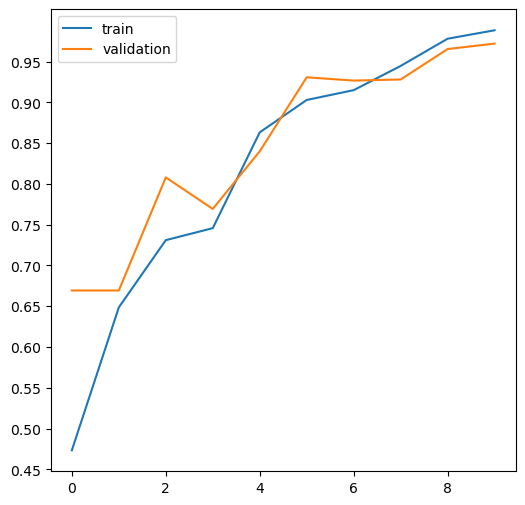

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)